In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
inp0 = pd.read_csv("all_data.csv")

In [4]:
inp0.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
inp0.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [6]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
inp0.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
inp0=inp0.dropna(how="all")

In [9]:
inp0.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
inp0 = inp0[inp0['Order Date'].str[0:2]!='Or']

In [11]:
inp0["Quantity Ordered"] = pd.to_numeric(inp0["Quantity Ordered"])
inp0["Price Each"] = pd.to_numeric(inp0["Price Each"])

In [12]:
inp0["Month"] = inp0["Order Date"].str[0:2]
inp0["Month"] = inp0["Month"].astype("int32")
inp0.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
def get_city(address):
    return  address.split(",")[1].strip(" ")
def get_state(address):
    return  address.split(",")[2].strip(" ")[1]

inp0["city"]= inp0["Purchase Address"].apply(lambda x: f"{get_city(x)} {get_state(x)}")

# Question 1: What was the best month for sales? How much was earned that month? 

In [24]:
inp0['Sales'] = inp0['Quantity Ordered'].astype('int') * inp0['Price Each'].astype('float')

In [25]:
inp0.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas X,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston A,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles A,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles A,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles A,11.99


In [28]:
res =inp0.groupby(["Month"]).sum()
res

C:\Users\VINOD-BHAI\AppData\Local\Temp\ipykernel_13452\4061157086.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res =inp0.groupby(["Month"]).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


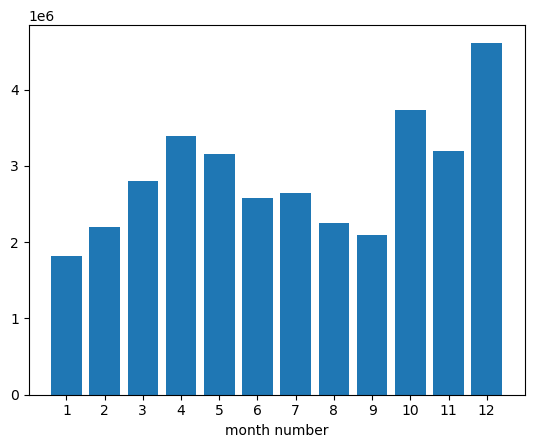

In [32]:
months= range(1,13)
plt.bar(months, res["Sales"])
plt.xticks(months)
plt.xlabel("month number")
plt.show()

# Question 2: What city sold the most product?

<Axes: xlabel='city', ylabel='count'>

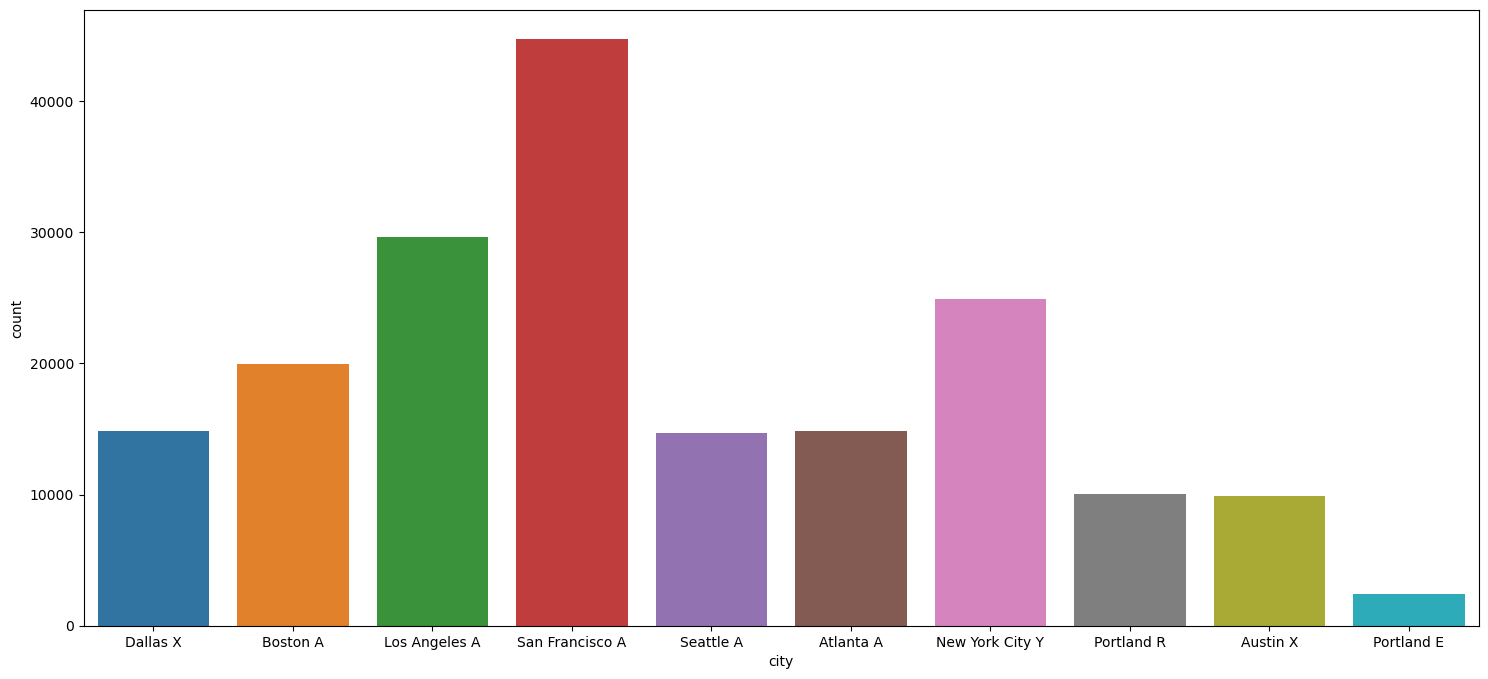

In [86]:
plt.figure(figsize=(18,8))
sns.countplot(data=inp0 ,x="city")


# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [38]:
inp0["Hour"] = pd.to_datetime(inp0["Order Date"]).dt.hour
inp0["Minute"] = pd.to_datetime(inp0["Order Date"]).dt.minute
inp0["Count"] = 1

C:\Users\VINOD-BHAI\AppData\Local\Temp\ipykernel_13452\1819351291.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair,df in inp0.groupby(["Hour"])]


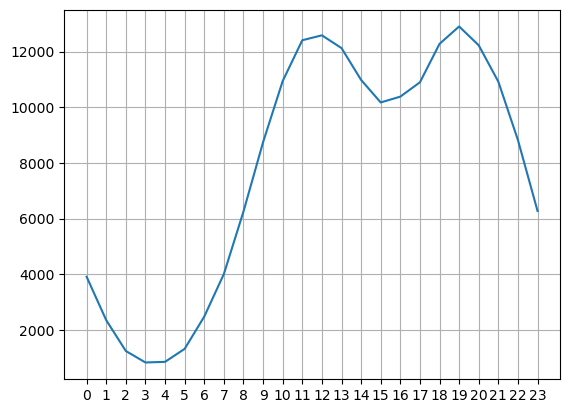

In [44]:
keys = [pair for pair,df in inp0.groupby(["Hour"])]
plt.plot(keys,inp0.groupby(["Hour"]).count()["Count"])
plt.xticks(keys)
plt.grid()
plt.show()

# Question 4: What products are most often sold together?

In [74]:
inp1 =inp0[inp0["Order ID"].duplicated(keep= False)]
inp1["Grouped"] = inp1.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
inp2=inp1.drop_duplicates()

C:\Users\VINOD-BHAI\AppData\Local\Temp\ipykernel_13452\3417383081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1["Grouped"] = inp1.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


In [84]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in inp2["Grouped"]:
    row_list =  row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2133
('Google Phone', 'USB-C Charging Cable') 2111
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 946
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 449
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


#    # What product sold the most? Why do you think it sold the most?

C:\Users\VINOD-BHAI\AppData\Local\Temp\ipykernel_13452\814727531.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_list = product_list.sum()["Quantity Ordered"]


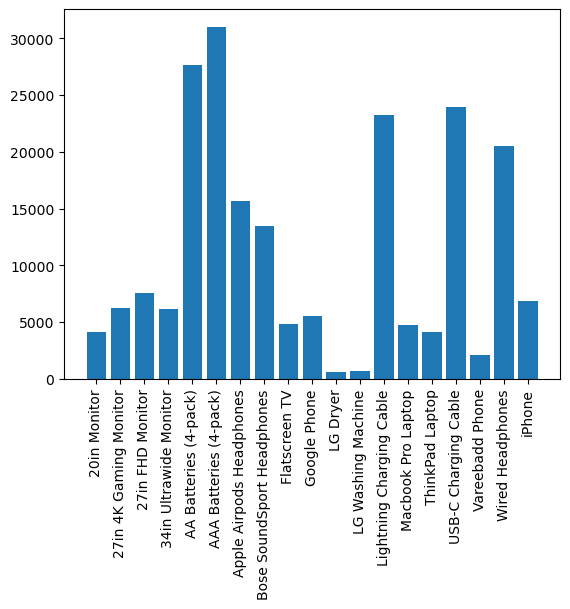

In [59]:
product_list = inp0.groupby("Product")
quantity_list = product_list.sum()["Quantity Ordered"]
keys = [pair for pair, df in product_list]
plt.bar(keys,quantity_list)
plt.xticks(rotation=90)
plt.show()

C:\Users\VINOD-BHAI\AppData\Local\Temp\ipykernel_13452\3758243359.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = inp0.groupby('Product').mean()['Price Each']
C:\Users\VINOD-BHAI\AppData\Local\Temp\ipykernel_13452\3758243359.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\VINOD-BHAI\AppData\Local\Temp\ipykernel_13452\3758243359.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


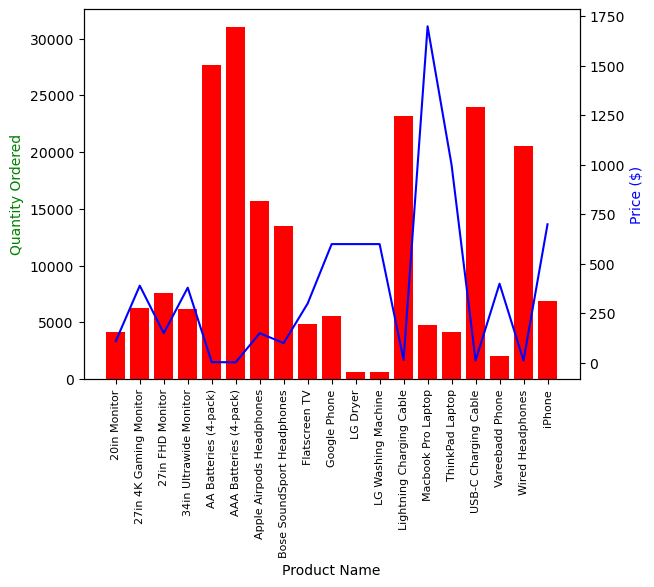

In [64]:
prices = inp0.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_list, color='r')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

# THANK YOU